In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_poor_income'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = 'a5f002bf-11e5-45f9-8c0d-dcbb259b2482'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(76, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:17:02.982,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.805346,1.000000,0.000000,0.849436,1.000000,0.000000,0.779902,1.000000,0.000000,0.813800
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.795534,1.000000,0.000000,0.849231,1.000000,0.000000,0.763707,1.000000,0.000000,0.805400
2,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:17:02.986,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.749135,1.000000,0.000000,0.758810,1.000000,0.000000,0.748576,1.000000,0.000000,0.753600
3,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:19:23.155,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.749019,1.000000,0.000000,0.760236,1.000000,0.000000,0.746022,1.000000,0.000000,0.753000
4,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:17:02.982,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.588293,0.533889,0.813381,0.539066,0.492874,0.799662,0.609634,0.552023,0.813776,0.575232
5,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.572282,0.516026,0.791160,0.528567,0.482502,0.788035,0.596082,0.535530,0.791788,0.563168
6,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:17:02.986,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.606254,0.545690,0.787111,0.580856,0.520142,0.771870,0.612565,0.552197,0.792301,0.596999
7,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:19:23.155,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.619669,0.560082,0.797500,0.597927,0.537228,0.790389,0.623418,0.563705,0.798816,0.610904
8,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:17:02.982,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.660236,1.000000,0.000000,0.616910,1.000000,0.000000,0.675302,1.000000,0.000000,0.654545
9,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.614829,1.000000,0.000000,0.587310,1.000000,0.000000,0.624729,1.000000,0.000000,0.611422


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.795534,1.000000,0.000000,0.849231,1.000000,0.000000,0.763707,1.000000,0.000000,0.805400
5,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.572282,0.516026,0.791160,0.528567,0.482502,0.788035,0.596082,0.535530,0.791788,0.563168
9,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.614829,1.000000,0.000000,0.587310,1.000000,0.000000,0.624729,1.000000,0.000000,0.611422
13,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.489414,0.000000,1.000000,0.495174,0.000000,1.000000,0.486762,0.000000,1.000000,0.489667
17,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.070612,0.000000,1.000000,0.057828,0.000000,1.000000,0.080671,0.000000,1.000000,0.068143
21,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.061283,0.054838,0.086358,0.056943,0.051562,0.087249,0.063690,0.056746,0.086131,0.060401
25,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.075651,0.052878,0.164258,0.060800,0.040048,0.177687,0.083005,0.058815,0.161189,0.072180
29,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.910770,0.938021,0.804744,0.928615,0.953237,0.789932,0.901737,0.930710,0.808092,0.914840
33,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.724391,0.747162,0.635793,0.772999,0.800008,0.620868,0.695185,0.711882,0.641217,0.733119
37,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:19:23.151,a5f002bf-11e5-45f9-8c0d-dcbb259b2482,Exp_iter_1,...,0.590379,0.532489,0.815617,0.545577,0.497969,0.813736,0.614882,0.552634,0.816068,0.581095


In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [13]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.008412,-0.057610,-0.004562,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.022843,-0.012607,-0.017871,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.008412,0.057610,0.004562,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.118239,1.046581,1.230517,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.076037,0.030976,0.152350,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.085523,0.050920,0.087079,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,1.029808,1.028640,1.039439,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,-0.006747,-0.005220,-0.007785,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,-0.006907,-0.004520,-0.007005,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,0.883776,0.920719,0.876782,RandomForestClassifier,Exp_iter_1,0.7,0


In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.008412,-0.057610,-0.004562,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.022843,-0.012607,-0.017871,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.008412,0.057610,0.004562,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.118239,1.046581,1.230517,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.076037,0.030976,0.152350,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [15]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [16]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

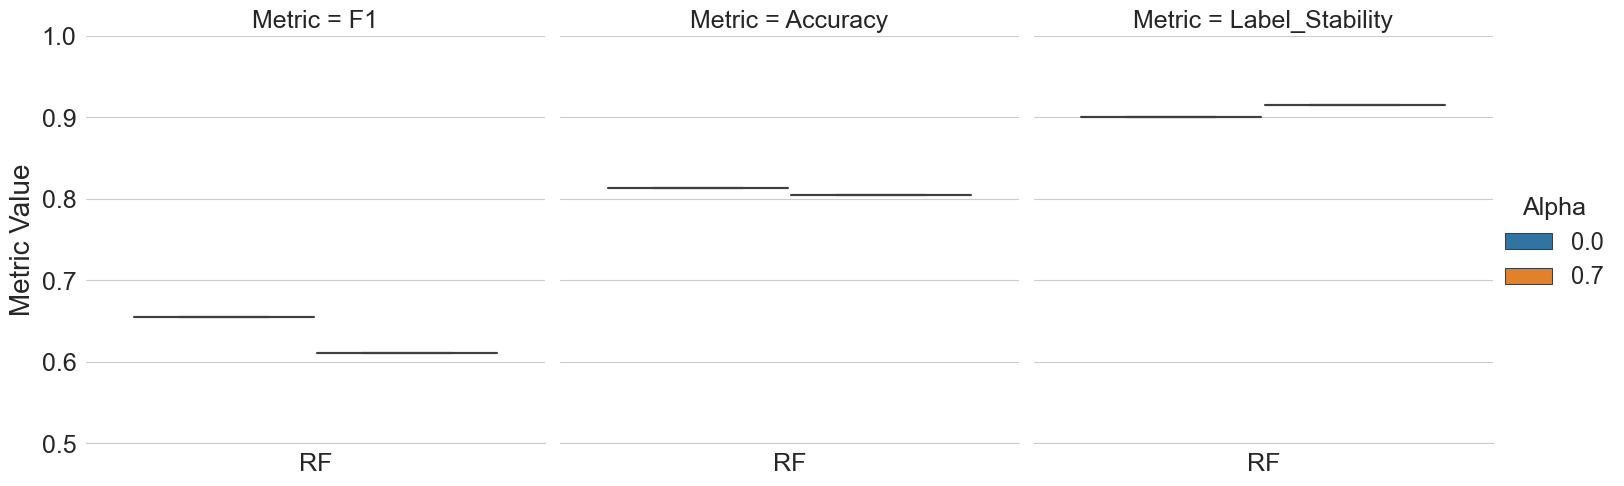

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.5, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

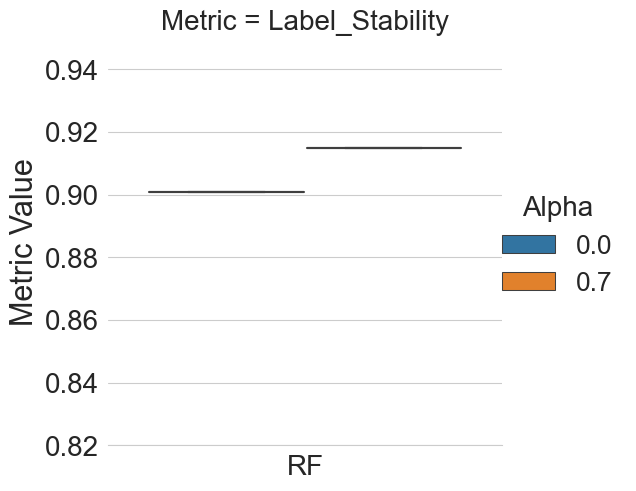

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

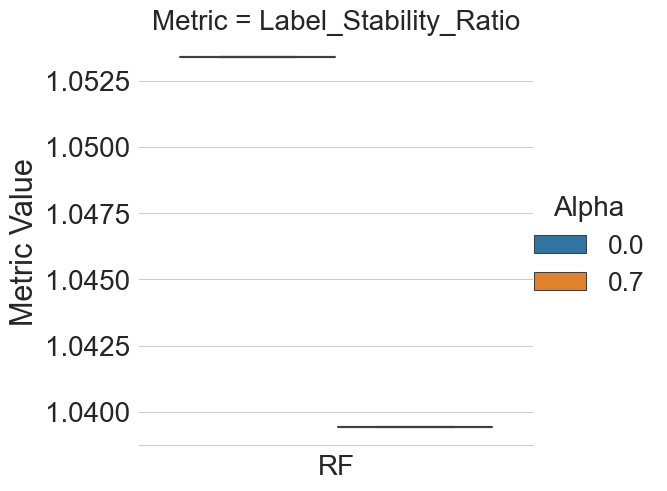

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

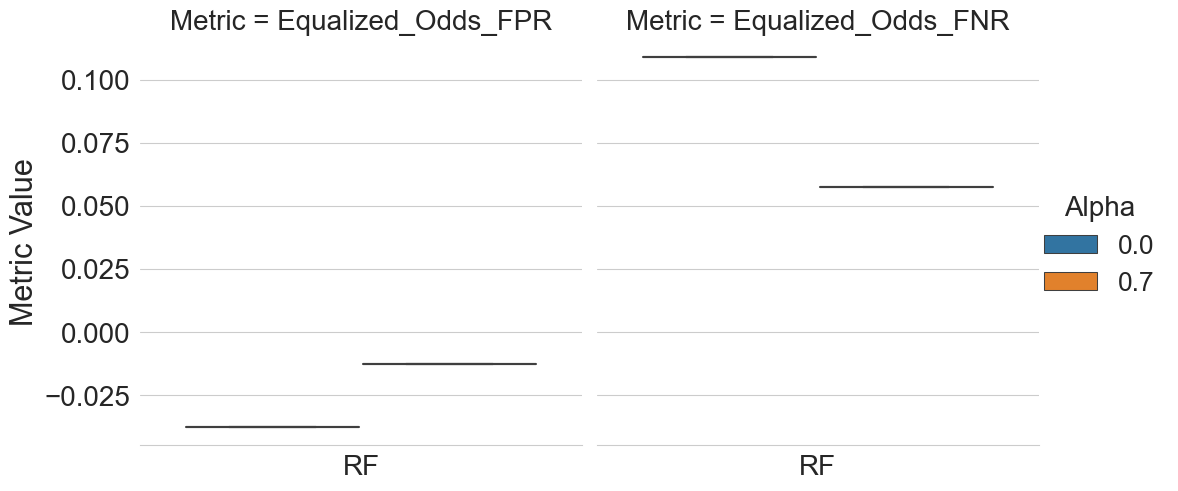

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [21]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Poor set',
    1: 'Rich set',
}

<Figure size 1200x600 with 0 Axes>

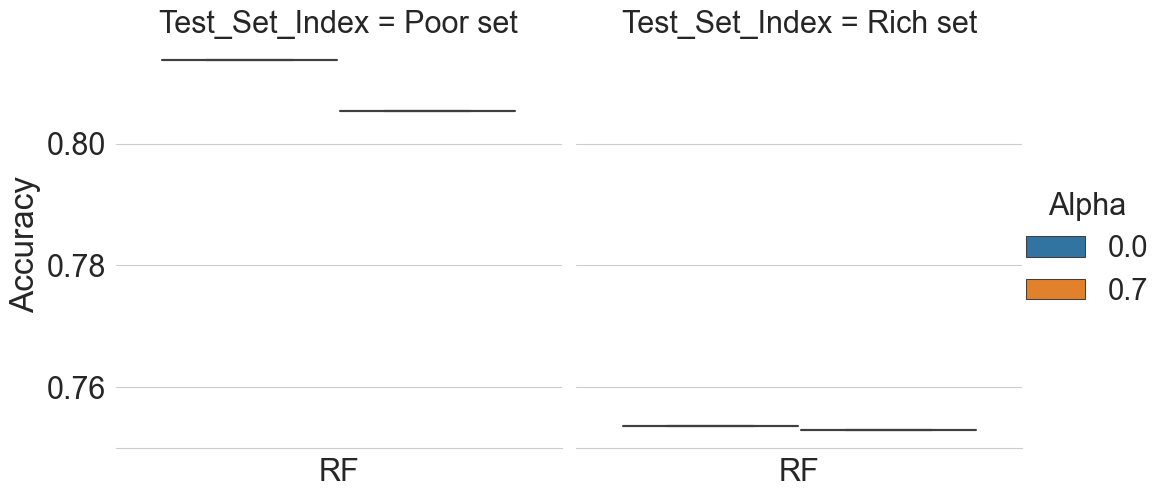

In [22]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

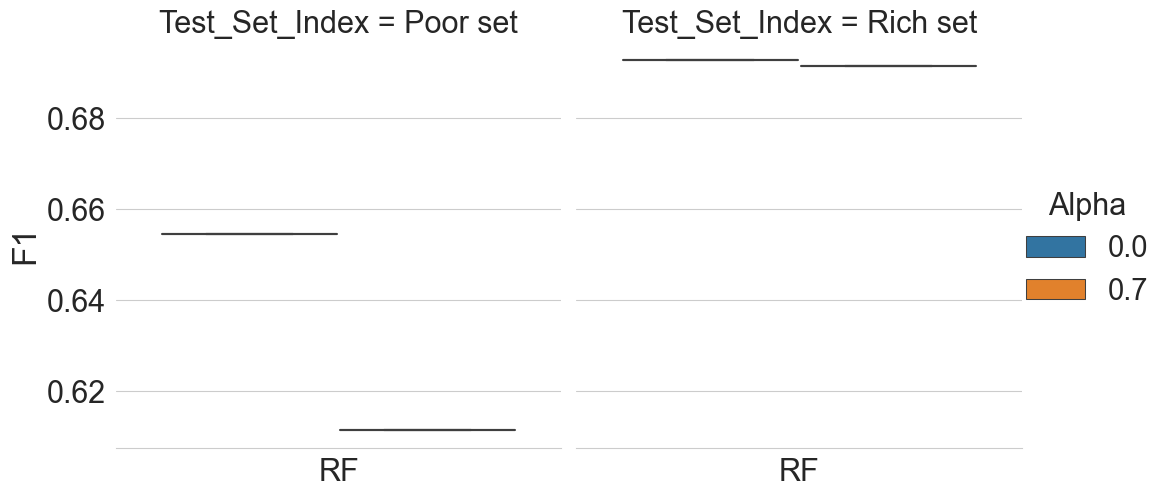

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

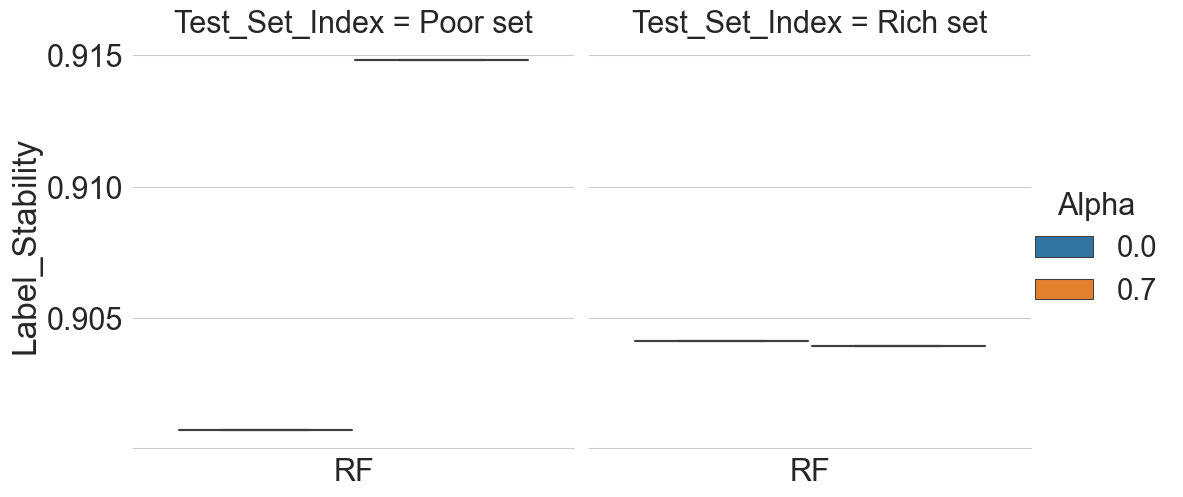

In [24]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

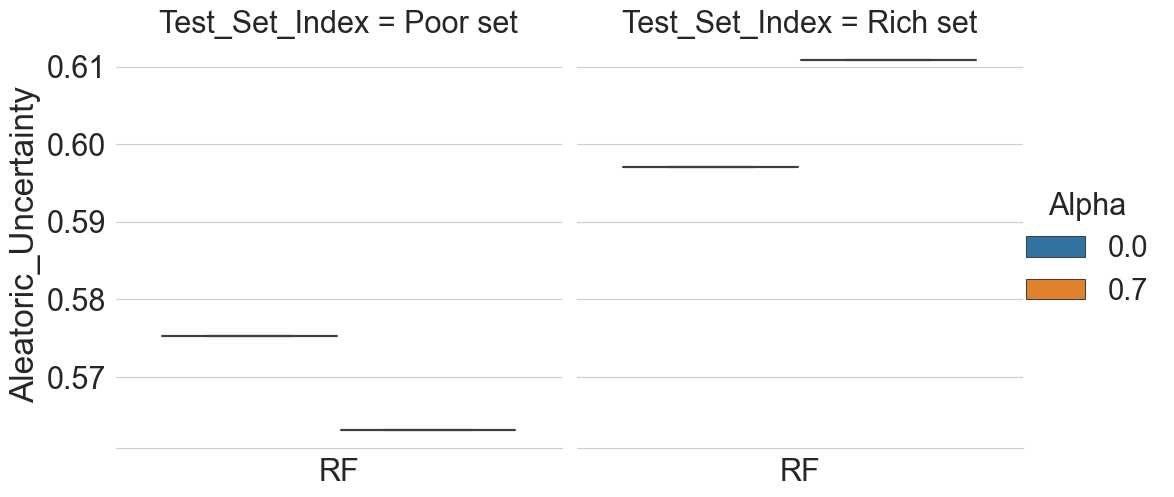

In [25]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

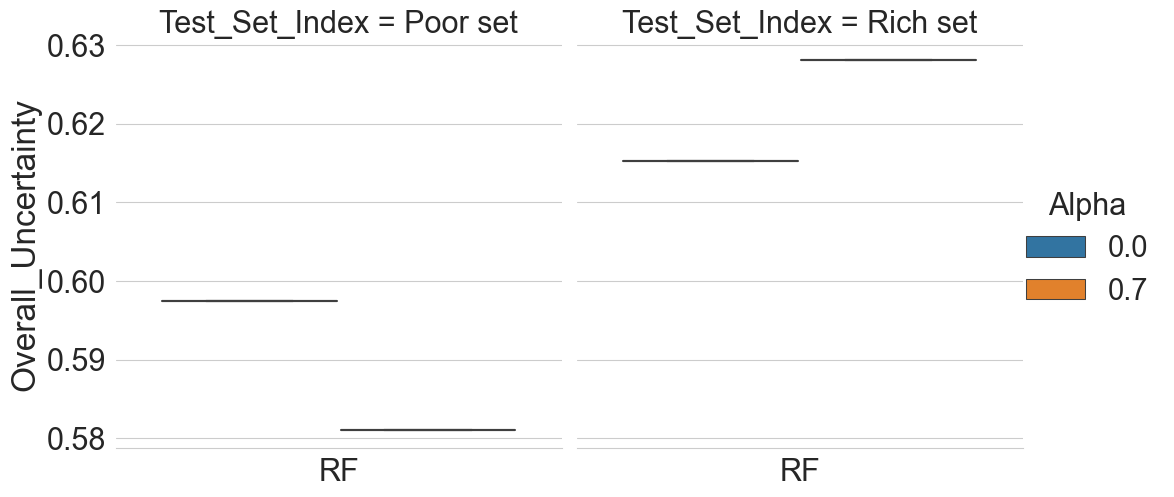

In [26]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

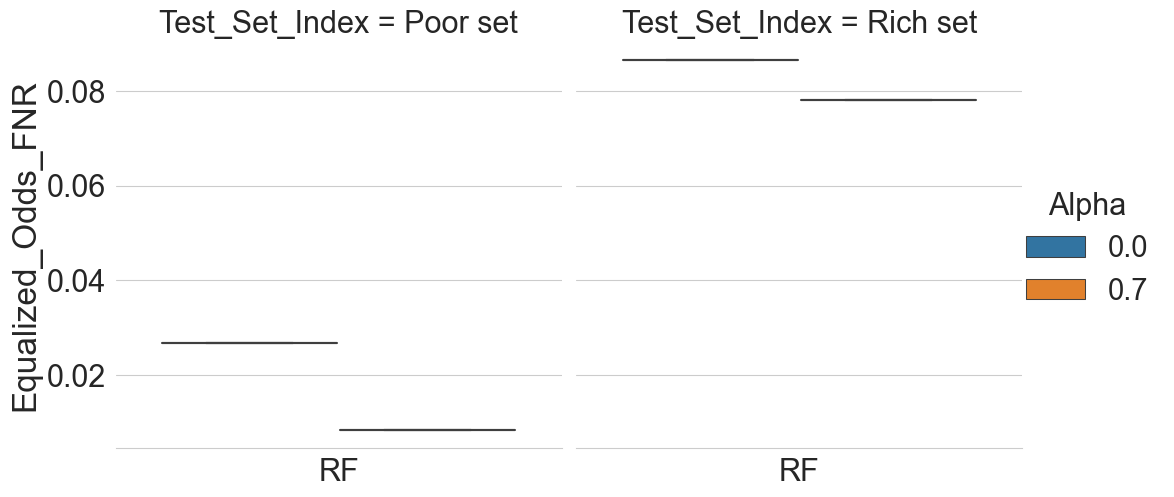

In [27]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

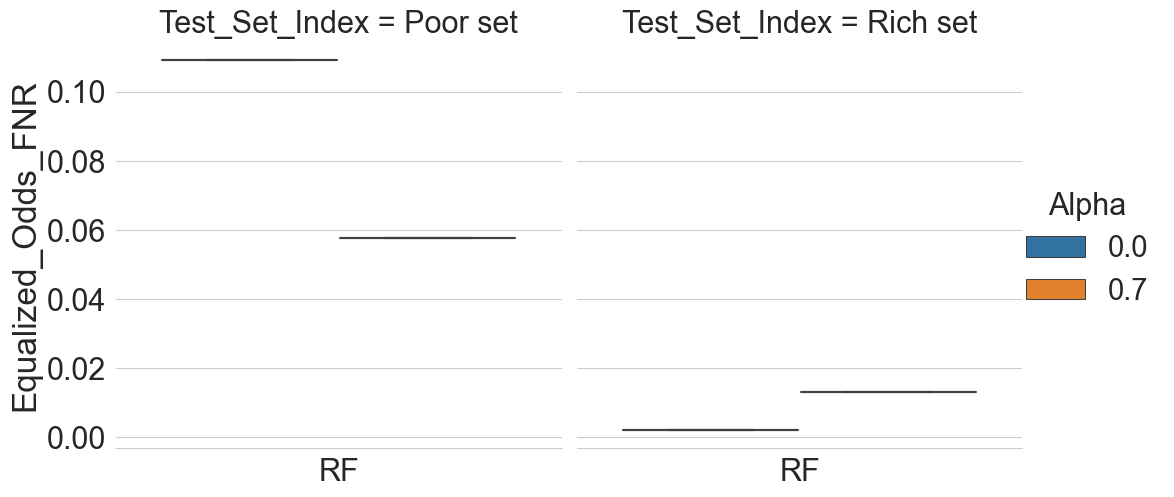

In [28]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

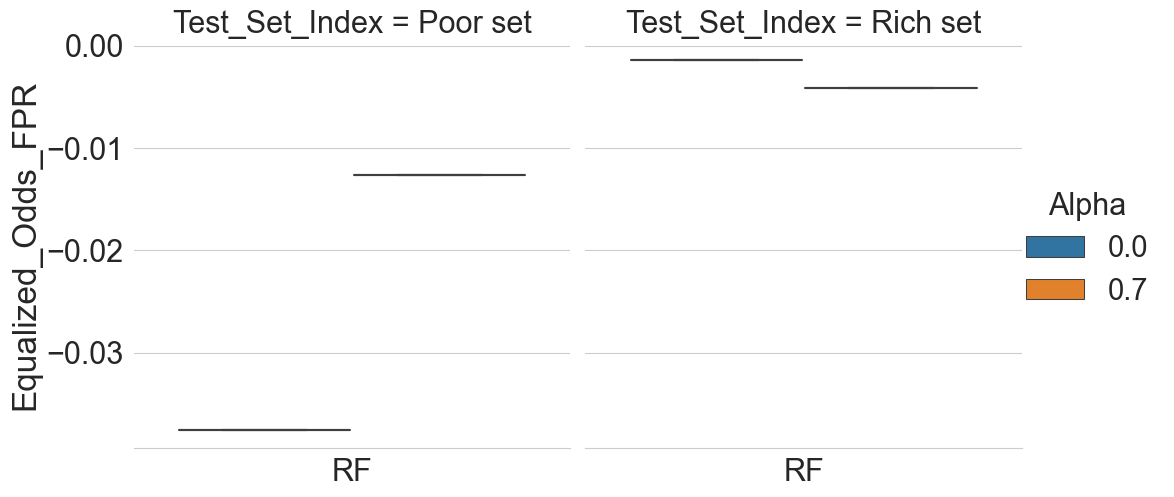

In [29]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)